# Data visualization and exploration

In [106]:
import sqlite3
from sqlite3 import Error

In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
%matplotlib inline

In [109]:
import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn



database = "NBA.db"
conn = create_connection(database)

## For this part, we focus on the choice'3' and choice'4'

### 1. Comparision between James's performance in this game and that in the games which Lakers won or lost

In [110]:
date = input('Please input date of a game(For example: 2020/1/2):')
date = date.strip()
with conn:

    james = "SELECT _MIN,PTS,REB,FG,AST,TOV,LOCATION FROM JAMES,LAKERS WHERE JAMES.DATE=LAKERS.DATE AND JAMES.DATE =?"
    cur = conn.cursor()
    cur.execute(james,[date])
    jdate = cur.fetchone()
    if jdate is None:
        print("James did not participate in this game.")
    else:
        _min = jdate[0]
        pts = jdate[1]
        reb = jdate[2]
        fg = jdate[3]
        ast = jdate[4]
        tov = jdate[5]
        loca = jdate[6]
    mpts = "SELECT MAX(JAMES.PTS),AVG(JAMES.PTS),MIN(JAMES.PTS) FROM JAMES,LAKERS WHERE JAMES.DATE=LAKERS.DATE AND LAKERS.RESULT=?"
    mast = "SELECT MAX(JAMES.AST),AVG(JAMES.AST),MIN(JAMES.AST) FROM JAMES,LAKERS WHERE JAMES.DATE=LAKERS.DATE AND LAKERS.RESULT=?"
    mtov = "SELECT MAX(JAMES.TOV),AVG(JAMES.TOV),MIN(JAMES.TOV) FROM JAMES,LAKERS WHERE JAMES.DATE=LAKERS.DATE AND LAKERS.RESULT=?"

    coun = "SELECT COUNT(*) FROM LAKERS WHERE RESULT=?"
        
    jamesasp=["points","assists","turnovers"]
    resu=["W","L"]
        
    cur = conn.cursor()
    cur.execute(coun,[resu[0]])
    counw = cur.fetchone()
    cur = conn.cursor()
    cur.execute(coun,[resu[1]])
    counl = cur.fetchone()
        
    cur = conn.cursor()
    cur.execute(mpts,[resu[0]])
    mwpts = cur.fetchall()
    cur = conn.cursor()
    cur.execute(mpts,[resu[1]])
    mlpts = cur.fetchall()
    cur = conn.cursor()
    cur.execute(mast,[resu[0]])
    mwast = cur.fetchall()
    cur = conn.cursor()
    cur.execute(mast,[resu[1]])
    mlast = cur.fetchall()
    cur = conn.cursor()
    cur.execute(mtov,[resu[0]])
    mwtov = cur.fetchall()
    cur = conn.cursor()
    cur.execute(mtov,[resu[1]])
    mltov = cur.fetchall()
        
    maxminw = mwpts+mwast+mwtov
    maxminl = mlpts+mlast+mltov

Please input date of a game(For example: 2020/1/2):2019/12/26


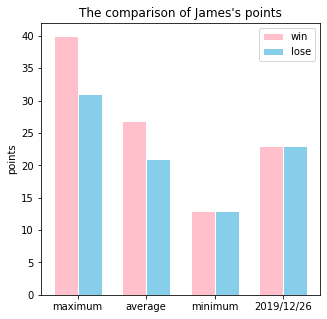

In [115]:
ptsc = {'class':["maximum","average","minimum",date],'win':[mwpts[0][0],mwpts[0][1],mwpts[0][2],pts],'lose':[mlpts[0][0],mlpts[0][1],mlpts[0][2],pts]}
ptsdf = pd.DataFrame(ptsc)
ptsdf.set_index('class')
x = np.arange(4)
tick_label = (ptsc['class'])
fig = plt.figure(figsize=(5,5))
plt.title("The comparison of James's points")
plt.bar(x,ptsdf['win'],width = 0.35,align="center",label="win",facecolor = 'pink',edgecolor = 'white')
plt.bar(x+0.35,ptsdf['lose'],width = 0.35,align="center",label="lose",facecolor = 'skyblue',edgecolor = 'white')
plt.xticks(x+0.35/2, tick_label)
plt.ylabel("points")
plt.legend()


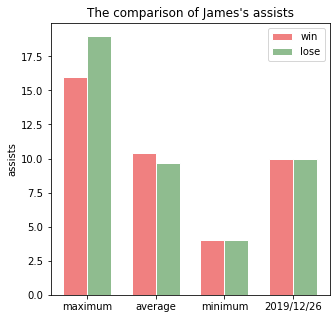

In [116]:
astc = {'class':["maximum","average","minimum",date],'win':[mwast[0][0],mwast[0][1],mwast[0][2],ast],'lose':[mlast[0][0],mlast[0][1],mlast[0][2],ast]}
astdf = pd.DataFrame(astc)
astdf.set_index('class')
x = np.arange(4)
tick_label = (astc['class'])
fig = plt.figure(figsize=(5,5))
plt.title("The comparison of James's assists")
plt.bar(x,astdf['win'],width = 0.35,align="center",label="win",facecolor = 'lightcoral',edgecolor = 'white')
plt.bar(x+0.35,astdf['lose'],width = 0.35,align="center",label="lose",facecolor = 'darkseagreen',edgecolor = 'white')
plt.xticks(x+0.35/2, tick_label)
plt.ylabel("assists")
plt.legend()

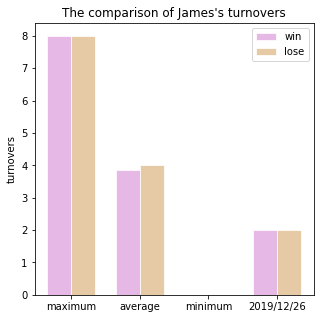

In [117]:
tovc = {'class':["maximum","average","minimum",date],'win':[mwtov[0][0],mwtov[0][1],mwtov[0][2],tov],'lose':[mltov[0][0],mltov[0][1],mltov[0][2],tov]}
tovdf = pd.DataFrame(tovc)
tovdf.set_index('class')
x = np.arange(4)
tick_label = (tovc['class'])
fig = plt.figure(figsize=(5,5))
plt.title("The comparison of James's turnovers")
plt.bar(x,tovdf['win'],width = 0.35,align="center",label="win",facecolor = 'plum',edgecolor = 'white',alpha=0.75)
plt.bar(x+0.35,tovdf['lose'],width = 0.35,align="center",label="lose",facecolor = 'burlywood',edgecolor = 'white',alpha=0.75)
plt.xticks(x+0.35/2, tick_label)
plt.ylabel("turnovers")
plt.legend()

## 2. Comparison between James's performance in this game and the average performance of other top players in the regular season
### In the 2019-2020 season, the Bucks and Heat were also very competitive teams.

- Comparision between James's performance in this game and the average performance of top players in Bucks

In [118]:
date = input('Please input date of a game(For example: 2020/1/2):')
date = date.strip()
with conn:

    james = "SELECT _MIN,PTS,REB,FG,AST,TOV,LOCATION FROM JAMES,LAKERS WHERE JAMES.DATE=LAKERS.DATE AND JAMES.DATE =?"
    cur = conn.cursor()
    cur.execute(james,[date])
    jdate = cur.fetchone()
    if jdate is None:
        print("James did not participate in this game.")
    else:
        _min = jdate[0]
        pts = jdate[1]
        reb = jdate[2]
        fg = jdate[3]
        ast = jdate[4]
        tov = jdate[5]
        loca = jdate[6]

    ptss = "SELECT PLAYER,PTS FROM PLAYERS WHERE TEAM =? AND PTS >=(SELECT MAX(PTS) FROM PLAYERS WHERE TEAM =?)"
    fgs = "SELECT PLAYER,FG FROM PLAYERS WHERE TEAM =? AND FG >=(SELECT MAX(FG) FROM PLAYERS WHERE TEAM =?)"
    rebs = "SELECT PLAYER,REB FROM PLAYERS P1 WHERE NOT EXISTS(SELECT * FROM PLAYERS P2 WHERE P1.REB<P2.REB AND P2.TEAM=?) AND P1.TEAM=?"

    cur = conn.cursor()
    cur.execute(ptss,("MIL","MIL"))
    ptscom = cur.fetchone()
    cur = conn.cursor()
    cur.execute(fgs,("MIL","MIL"))
    fgcom = cur.fetchone()
    cur = conn.cursor()
    cur.execute(rebs,("MIL","MIL"))
    rebcom = cur.fetchone()
    
    jamesavg = "SELECT PTS,FG,REB FROM PLAYERS WHERE PLAYER =?"
    cur = conn.cursor()
    cur.execute(jamesavg,["LeBron James"])
    jamescom = cur.fetchone()

Please input date of a game(For example: 2020/1/2):2019/12/26


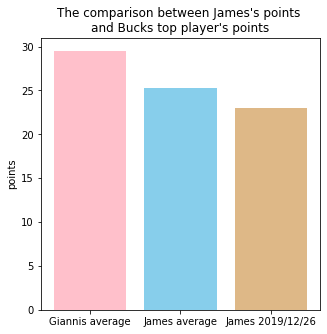

In [120]:
ptsot = {'class':[ptscom[0]+"average","James average","James "+date],'pts':[ptscom[1],jamescom[0],pts]}
ptsotdf = pd.DataFrame(ptsot)
ptsotdf.set_index('class')
tick_label = (ptsot['class'])
x = np.arange(3)
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(3), ptsot['class'])
plt.bar(np.arange(len(ptsot['class'])),ptsotdf['pts'],color=['pink','skyblue','burlywood'])
plt.title("The comparison between James's points and Bucks top player's points")
plt.ylabel("points")
plt.show()

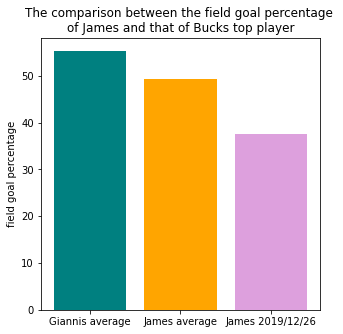

In [122]:
fgot = {'class':[fgcom[0]+"average","James average","James "+date],'fg':[fgcom[1],jamescom[1],fg]}
fgotdf = pd.DataFrame(fgot)
fgotdf.set_index('class')
tick_label = (fgot['class'])
x = np.arange(3)
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(3), fgot['class'])
plt.bar(np.arange(len(fgot['class'])),fgotdf['fg'],color=['teal','orange','plum'])
plt.title("The comparison between the field goal percentage \nof James and that of Bucks top player")
plt.ylabel("field goal percentage")
plt.show()

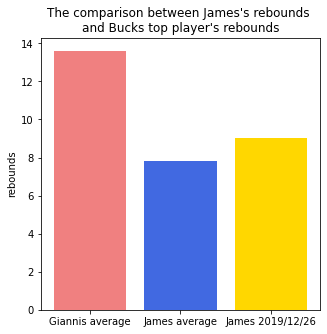

In [123]:
rebot = {'class':[rebcom[0]+"average","James average","James "+date],'reb':[rebcom[1],jamescom[2],reb]}
rebotdf = pd.DataFrame(rebot)
rebotdf.set_index('class')
tick_label = (rebot['class'])
x = np.arange(3)
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(3), rebot['class'])
plt.bar(np.arange(len(rebot['class'])),rebotdf['reb'],color=['lightcoral','royalblue','gold'])
plt.title("The comparison between James's rebounds \nand Bucks top player's rebounds")
plt.ylabel("rebounds")
plt.show()

- Comparision between James's performance in this game and the average performance of top players in Heat

In [125]:
date = input('Please input date of a game(For example: 2020/1/2):')
date = date.strip()
with conn:

    james = "SELECT _MIN,PTS,REB,FG,AST,TOV,LOCATION FROM JAMES,LAKERS WHERE JAMES.DATE=LAKERS.DATE AND JAMES.DATE =?"
    cur = conn.cursor()
    cur.execute(james,[date])
    jdate = cur.fetchone()
    if jdate is None:
        print("James did not participate in this game.")
    else:
        _min = jdate[0]
        pts = jdate[1]
        reb = jdate[2]
        fg = jdate[3]
        ast = jdate[4]
        tov = jdate[5]
        loca = jdate[6]

    ptss = "SELECT PLAYER,PTS FROM PLAYERS WHERE TEAM =? AND PTS >=(SELECT MAX(PTS) FROM PLAYERS WHERE TEAM =?)"
    fgs = "SELECT PLAYER,FG FROM PLAYERS WHERE TEAM =? AND FG >=(SELECT MAX(FG) FROM PLAYERS WHERE TEAM =?)"
    rebs = "SELECT PLAYER,REB FROM PLAYERS P1 WHERE NOT EXISTS(SELECT * FROM PLAYERS P2 WHERE P1.REB<P2.REB AND P2.TEAM=?) AND P1.TEAM=?"

    cur = conn.cursor()
    cur.execute(ptss,("MIA","MIA"))
    ptscom = cur.fetchone()
    cur = conn.cursor()
    cur.execute(fgs,("MIA","MIA"))
    fgcom = cur.fetchone()
    cur = conn.cursor()
    cur.execute(rebs,("MIA","MIA"))
    rebcom = cur.fetchone()
    
    jamesavg = "SELECT PTS,FG,REB FROM PLAYERS WHERE PLAYER =?"
    cur = conn.cursor()
    cur.execute(jamesavg,["LeBron James"])
    jamescom = cur.fetchone()

Please input date of a game(For example: 2020/1/2):2019/12/26


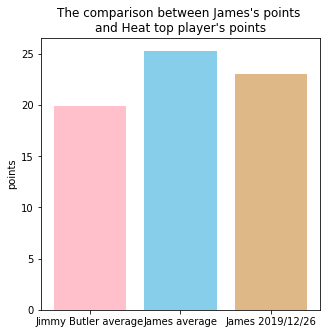

In [126]:
ptsot = {'class':[ptscom[0]+" average","James average","James "+date],'pts':[ptscom[1],jamescom[0],pts]}
ptsotdf = pd.DataFrame(ptsot)
ptsotdf.set_index('class')
tick_label = (ptsot['class'])
x = np.arange(3)
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(3), ptsot['class'])
plt.bar(np.arange(len(ptsot['class'])),ptsotdf['pts'],color=['pink','skyblue','burlywood'])
plt.title("The comparison between James's points \nand Heat top player's points")
plt.ylabel("points")
plt.show()

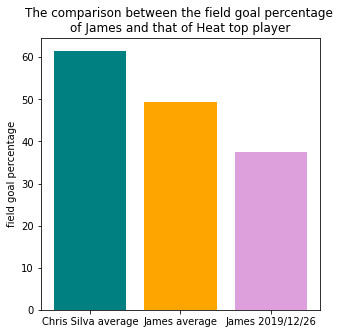

In [127]:
fgot = {'class':[fgcom[0]+" average","James average","James "+date],'fg':[fgcom[1],jamescom[1],fg]}
fgotdf = pd.DataFrame(fgot)
fgotdf.set_index('class')
tick_label = (fgot['class'])
x = np.arange(3)
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(3), fgot['class'])
plt.bar(np.arange(len(fgot['class'])),fgotdf['fg'],color=['teal','orange','plum'])
plt.title("The comparison between the field goal percentage \nof James and that of Heat top player")
plt.ylabel("field goal percentage")
plt.show()

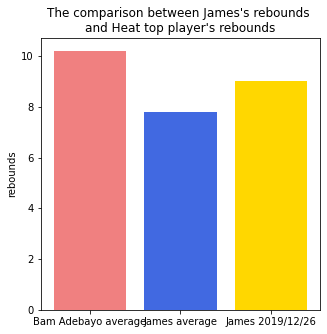

In [128]:
rebot = {'class':[rebcom[0]+" average","James average","James "+date],'reb':[rebcom[1],jamescom[2],reb]}
rebotdf = pd.DataFrame(rebot)
rebotdf.set_index('class')
tick_label = (rebot['class'])
x = np.arange(3)
fig = plt.figure(figsize=(5,5))
plt.xticks(np.arange(3), rebot['class'])
plt.bar(np.arange(len(rebot['class'])),rebotdf['reb'],color=['lightcoral','royalblue','gold'])
plt.title("The comparison between James's rebounds \nand Heat top player's rebounds")
plt.ylabel("rebounds")
plt.show()